# José Domingo Cajina Ramírez

18/03/2020

---


*   Modelo Matemático de contagio COVID-19




In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
!wget -cq https://raw.githubusercontent.com/Physicworld/COVID19/master/InfectadosEspa%C3%B1aMexico.csv

In [0]:
data = pd.read_csv("InfectadosEspañaMexico.csv", encoding='Latin-1', header=1)
data = pd.DataFrame(data)

In [9]:
data

,Dia,Casos,Muertos,Dia.1,Casos.1,Muertos.1
0,1,9,0,1.0,11.0,0.0
1,2,13,0,2.0,12.0,0.0
2,3,25,0,3.0,26.0,0.0
3,4,33,0,4.0,41.0,0.0
4,5,58,0,5.0,53.0,0.0
5,6,84,0,6.0,82.0,0.0
6,7,120,0,7.0,93.0,0.0
7,8,165,1,8.0,118.0,1.0
8,9,228,2,NaN,NaN,NaN
9,10,282,3,NaN,NaN,NaN


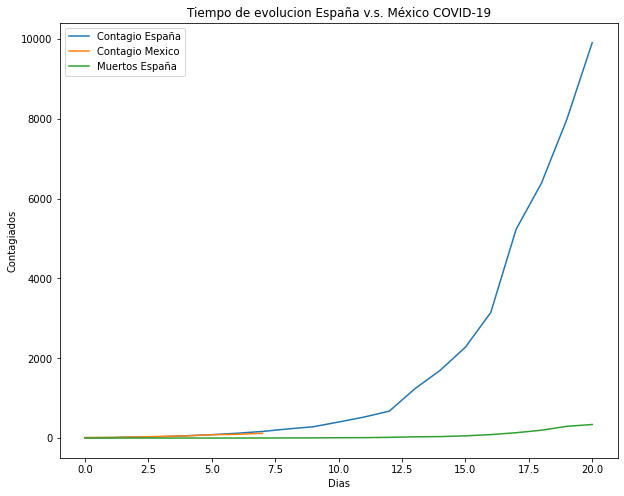

In [33]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.plot(data['Casos'], label="Contagio España")
ax.plot(data['Casos.1'], label="Contagio Mexico")
ax.plot(data['Muertos'], label="Muertos España")
plt.xlabel("Dias")
plt.ylabel("Contagiados")
plt.title("Tiempo de evolucion España v.s. México COVID-19")
plt.legend()
plt.savefig("Modelo")
plt.show()